In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
customer = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
spend = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
repayment = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
repayment.drop(columns = 'Unnamed: 4',axis=1,inplace=True)
repayment.at[0,'SL No:']=1.0
repayment.dropna(inplace = True)
repayment

,SL No:,Customer,Month,Amount
0,1.0,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [6]:
cust_spend = pd.merge(left = customer, right = spend, on = 'Customer', how = 'inner')
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [7]:
credit = pd.merge(left = cust_spend,right = repayment, on = 'Customer', how = 'inner',suffixes = ('_cust_spend','_repayment'))
credit

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_cust_spend,Type,Amount_cust_spend,SL No:,Month_repayment,Amount_repayment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,1.0,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,25-Jan-04,310992.30
37280,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,99.0,12-Jan-04,121874.90
37281,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,100.0,3-Jan-04,337815.57
37282,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,101.0,15-Jan-04,25682.73


# 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.


In [8]:
customer.loc[customer.Age<18,'Age'] = customer.Age.mean() 
customer.loc[customer.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment


###  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [9]:
cust_spend.loc[cust_spend.Amount>cust_spend.Limit,'Amount'] = (50*cust_spend.Limit)/100
cust_spend.loc[cust_spend.Amount>cust_spend.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [10]:
credit.loc[credit.Amount_repayment>credit.Limit,'Amount_repayment'] = credit.Limit
credit.loc[credit.Amount_repayment>credit.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_cust_spend,Type,Amount_cust_spend,SL No:,Month_repayment,Amount_repayment


## 2. From the above dataset create the following summaries:
 ### a. How many distinct customers exist?


In [11]:
customer.Customer.nunique()

100

###  b. How many distinct categories exist?


In [12]:
customer.Segment.nunique()

5

###  c. What is the average monthly spend by customers?


In [13]:
spend['Month'] = pd.to_datetime(spend.Month)
spend['Month_Name'] = spend['Month'].dt.month_name()
spend['Year'] = spend['Month'].dt.year
spend.groupby(['Year','Month_Name'])[['Amount']].mean()

Amount
Year Month_Name               
2004 April       235272.037143
     February    221215.270000
     January     251712.068664
     March       232146.119286
     May         217539.236429
     November    270486.397857
     September   310923.383571
2005 April       252181.326429
     August      233734.634286
     December    147503.060000
     February    229802.279821
     January     292741.372857
     July        229116.663571
     June        262688.112857
     May         245696.515429
     November    286143.322857
     October     194568.640714
     September   188666.202143
2006 April       232468.967553
     August      240699.717143
     December    270470.980714
     February    253858.260714
     January     282058.006429
     July        287505.098929
     June        177252.386429
     March       247166.084654
     May         236162.740357
     November    182841.290000
     October     236136.335000
     September   158520.090714

### d. What is the average monthly repayment by customers?


In [14]:
repayment['Month'] = pd.to_datetime(repayment.Month)
repayment['Month_Name'] = repayment['Month'].dt.month_name()
repayment['Year'] = repayment['Month'].dt.year
repayment.groupby(['Year','Month_Name'])[['Amount']].mean()

Amount
Year Month_Name               
2004 April       259141.679000
     February    256702.630741
     January     243489.649786
     March       252585.280667
     May         226162.720800
     November    209592.238000
     September   184487.848750
2005 April       212688.631333
     August      264430.921622
     December    320379.335833
     February    238829.265123
     January     240548.098148
     July        239871.479167
     June        210199.818333
     May         263207.367857
     November    256695.120000
     October     219849.956667
     September   247700.170000
2006 April       275472.251889
     August      224143.992500
     December    252736.569167
     February    284489.565128
     January     293475.389167
     July        257936.383243
     June        251990.453333
     March       240851.266814
     May         256920.884943
     November    199399.197407
     October     260765.480000
     September   262533.880833

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [15]:
main_table = pd.merge(left = cust_spend, right = repayment, on = 'Customer', how = 'inner')
main_table.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Month_Name,Year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,1.0,2004-01-12,495414.75,January,2004


In [16]:
spend_repay = main_table.groupby(['Year','Month_Name'])[['Amount_x','Amount_y']].sum().reset_index()
spend_repay['Profit'] = spend_repay.Amount_y - spend_repay.Amount_x
spend_repay.head()

,Year,Month_Name,Amount_x,Amount_y,Profit
0,2004,April,1.194516e+08,2.285403e+08,1.090887e+08
1,2004,February,7.613922e+07,1.602419e+08,8.410268e+07
2,2004,January,1.088357e+09,1.699210e+09,6.108525e+08
3,2004,March,5.594171e+07,8.974470e+07,3.380298e+07
4,2004,May,8.800456e+07,1.411594e+08,5.315485e+07


### f. What are the top 5 product types?

In [17]:
main_table.groupby('Type')[['Customer']].count().sort_values(by='Customer',ascending = False).iloc[0:5]

,Customer
Type,
PETRO,4829
CAMERA,4237
FOOD,4056
AIR TICKET,3537
TRAIN TICKET,3387


###  g. Which city is having maximum spend?


In [18]:
cust_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount',ascending = False).iloc[0:1]

,Amount
City,
COCHIN,45963513.5


### h. Which age group is spending more money?


In [19]:
cust_spend['age_group'] = pd.cut(cust_spend['Age'],bins = np.arange(18,90,9))
cust_spend.groupby('age_group')[['Amount']].sum().sort_values(by='Amount',ascending = False).iloc[0:1]

,Amount
age_group,
"(45, 54]",44254446.94


### i. Who are the top 10 customers in terms of repayment?

In [20]:
repayment.groupby('Customer')[['Amount']].sum().sort_values(by='Amount',ascending=False).iloc[0:10]

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [21]:
cust_spend['Month'] = pd.to_datetime(cust_spend.Month)
cust_spend['Year'] = cust_spend.Month.dt.year
summary = pd.pivot_table(data = cust_spend,index = ['City','Product'],columns = 'Year', values = 'Amount', aggfunc = 'sum')
summary

Year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

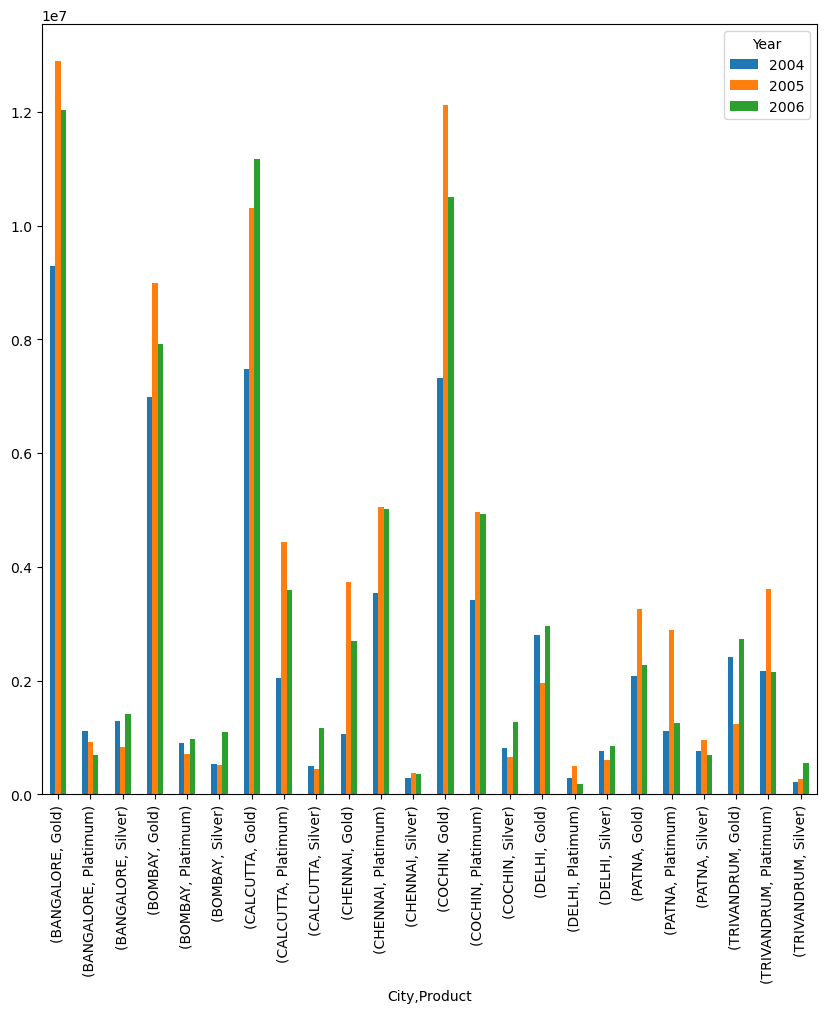

In [22]:
summary.plot(kind = 'bar',figsize = (10,10))
plt.show()

# 4. Create graphs for
 ## a. Monthly comparison of total spends, city wise


<AxesSubplot:xlabel='City'>

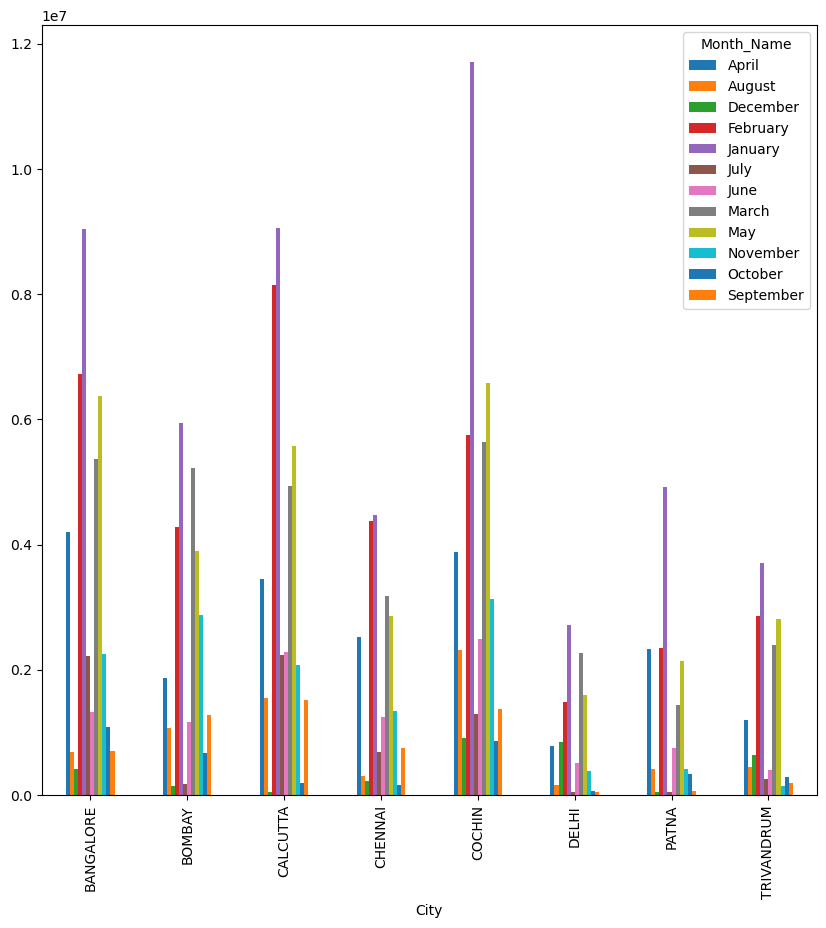

In [23]:
cust_spend['Month_Name'] = cust_spend.Month.dt.month_name()
M_comparison = pd.pivot_table(data = cust_spend, index = 'City',columns = 'Month_Name',values = 'Amount',aggfunc = 'sum')
M_comparison.plot(kind = 'bar',figsize = (10,10))

### b. Comparison of yearly spend on air tickets

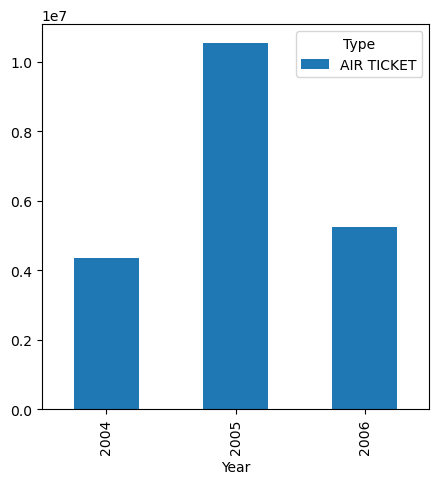

In [24]:
air = cust_spend.loc[cust_spend.Type == 'AIR TICKET']
spend_value = air.pivot_table(index = 'Year',columns = 'Type', values = 'Amount', aggfunc = 'sum')
spend_value.plot(kind='bar',figsize = (5,5))
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


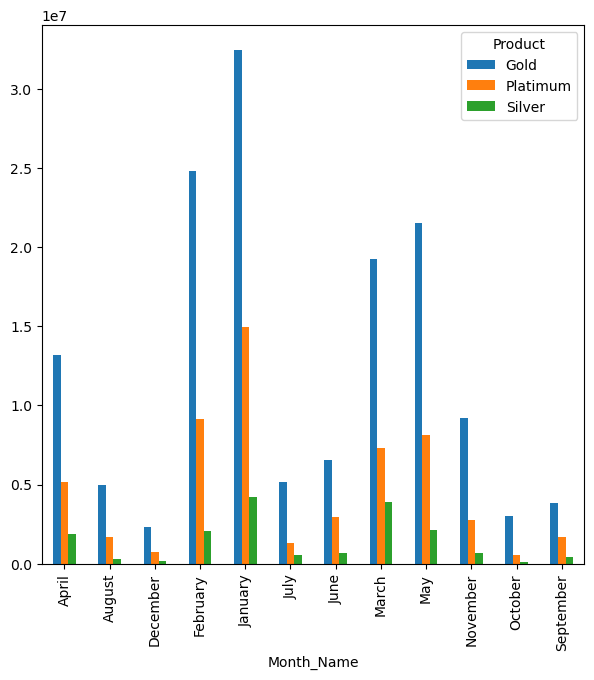

In [25]:
cust_spend.pivot_table(index = 'Month_Name',columns = 'Product', values = 'Amount', aggfunc = 'sum').plot(kind = 'bar',figsize = (7,7))
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [47]:
cust_repay = pd.merge(left = customer, right = repayment, on = 'Customer', how = 'inner')
def fianl_table(products,time_period):
    if products == 'Gold'and time_period=='Month_Name':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Month_Name',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Gold',:]
    elif products == 'Gold'and time_period=='Year':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Year',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Gold',:] 
    elif products == 'Silver'and time_period=='Month_Name':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Month_Name',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Silver',:]
    elif products == 'Silver'and time_period=='Year':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Year',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Silver',:] 
    elif products == 'Platimum'and time_period=='Month_Name':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Month_Name',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Platimum',:]
    elif products == 'Platimum'and time_period=='Year':
        pivot = cust_repay.pivot_table(index = ['Product','City','Customer'],columns = 'Year',values = 'Amount',aggfunc = 'sum')
        final = pivot.loc['Platimum',:] 
    return final

In [50]:
fianl_table('Platimum','Month_Name')

Month_Name                April      August   December    February  \
City       Customer                                                  
BANGALORE  A19        777013.43         NaN  169987.85   477491.51   
           A37       1028530.57   368760.27  343316.99  1106271.48   
           A5           7276.60         NaN        NaN   165348.26   
           A52        433138.67   823750.27        NaN   385345.25   
BOMBAY     A33              NaN   365544.42        NaN  1118708.88   
           A36       1670108.19   298497.43  146321.26  1143572.07   
           A4         100644.99         NaN  277825.13   525346.48   
           A51        315663.16         NaN        NaN   515389.66   
           A70              NaN   454016.51        NaN   327639.37   
           A71              NaN         NaN        NaN    30997.74   
CALCUTTA   A20       1574589.07   213205.01        NaN   434422.66   
           A34        252926.33   498456.34        NaN   434527.15   
           A40              NaN   488742.81  169786.15   937643.24   
           A49        839940.72   321122.85   60465.21  1443241.60   
           A69              NaN         NaN        NaN         NaN   
           A98              NaN         NaN        NaN         NaN   
           A99              NaN         NaN        NaN         NaN   
CHENNAI    A38        369151.51         NaN  492660.82  1365681.76   
           A47        933984.21         NaN        NaN  1847459.98   
           A56        770261.09         NaN  162103.09   413912.92   
COCHIN     A21        877084.23  1321914.34  489260.28  1273008.15   
           A3         416028.53         NaN        NaN   829136.79   
           A35        451765.18   252064.03        NaN   964574.60   
           A41        147383.00     6865.68        NaN   509624.20   
           A50        400356.35   314859.52        NaN   521586.07   
           A54       1025491.68         NaN  215719.14  1149119.64   
           A83              NaN         NaN        NaN         NaN   
DELHI      A53       1102590.32    50308.75  457386.20   907752.01   
PATNA      A55        619774.41         NaN        NaN  1124130.33   
TRIVANDRUM A39        472407.74         NaN  278687.47  1212860.65   
           A48       1319286.12         NaN        NaN  1197704.45   
           A97              NaN         NaN        NaN         NaN   

Month_Name              January       July       June       March         May  \
City       Customer                                                             
BANGALORE  A19        501537.05  281361.68   55869.98   513593.40   696628.83   
           A37       1146853.78        NaN  606994.42   643390.71   602852.30   
           A5        1117589.04        NaN        NaN   716704.70   367110.79   
           A52        673659.66  470475.57        NaN   996688.61   145665.69   
BOMBAY     A33              NaN  824720.02  448965.39  1018256.46  1025203.99   
           A36        883551.47  213919.73  165533.79   345065.63   316914.74   
           A4         314700.58        NaN        NaN   271095.26   643029.46   
           A51        912432.05  985641.88  309674.92   339411.84    74206.01   
           A70              NaN        NaN        NaN         NaN         NaN   
           A71              NaN        NaN        NaN         NaN         NaN   
CALCUTTA   A20       1194669.87  237612.00        NaN   562667.26         NaN   
           A34              NaN  223157.52  104781.85   333955.81   197323.24   
           A40       1749083.51  242107.49        NaN  1176947.70  1401293.97   
           A49        814593.08  172212.79  849623.74  1128617.99  1199140.48   
           A69        140533.08  247628.45        NaN         NaN         NaN   
           A98        337815.57        NaN        NaN         NaN         NaN   
           A99         25682.73        NaN        NaN         NaN         NaN   
CHENNAI    A38       1655584.31        NaN  215272.04   775994.68   981011.33   